In [24]:
#importing packages 

import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import plot_confusion_matrix 
from sklearn import metrics 

In [11]:
# import dataset 

iris = datasets.load_iris()
x = iris.data[:,2:4]
y = iris.target[:]

print(x)
print(y)


[[1.4 0.2]
 [1.4 0.2]
 [1.3 0.2]
 [1.5 0.2]
 [1.4 0.2]
 [1.7 0.4]
 [1.4 0.3]
 [1.5 0.2]
 [1.4 0.2]
 [1.5 0.1]
 [1.5 0.2]
 [1.6 0.2]
 [1.4 0.1]
 [1.1 0.1]
 [1.2 0.2]
 [1.5 0.4]
 [1.3 0.4]
 [1.4 0.3]
 [1.7 0.3]
 [1.5 0.3]
 [1.7 0.2]
 [1.5 0.4]
 [1.  0.2]
 [1.7 0.5]
 [1.9 0.2]
 [1.6 0.2]
 [1.6 0.4]
 [1.5 0.2]
 [1.4 0.2]
 [1.6 0.2]
 [1.6 0.2]
 [1.5 0.4]
 [1.5 0.1]
 [1.4 0.2]
 [1.5 0.2]
 [1.2 0.2]
 [1.3 0.2]
 [1.4 0.1]
 [1.3 0.2]
 [1.5 0.2]
 [1.3 0.3]
 [1.3 0.3]
 [1.3 0.2]
 [1.6 0.6]
 [1.9 0.4]
 [1.4 0.3]
 [1.6 0.2]
 [1.4 0.2]
 [1.5 0.2]
 [1.4 0.2]
 [4.7 1.4]
 [4.5 1.5]
 [4.9 1.5]
 [4.  1.3]
 [4.6 1.5]
 [4.5 1.3]
 [4.7 1.6]
 [3.3 1. ]
 [4.6 1.3]
 [3.9 1.4]
 [3.5 1. ]
 [4.2 1.5]
 [4.  1. ]
 [4.7 1.4]
 [3.6 1.3]
 [4.4 1.4]
 [4.5 1.5]
 [4.1 1. ]
 [4.5 1.5]
 [3.9 1.1]
 [4.8 1.8]
 [4.  1.3]
 [4.9 1.5]
 [4.7 1.2]
 [4.3 1.3]
 [4.4 1.4]
 [4.8 1.4]
 [5.  1.7]
 [4.5 1.5]
 [3.5 1. ]
 [3.8 1.1]
 [3.7 1. ]
 [3.9 1.2]
 [5.1 1.6]
 [4.5 1.5]
 [4.5 1.6]
 [4.7 1.5]
 [4.4 1.3]
 [4.1 1.3]
 [4.  1.3]
 [4.4 1.2]

In [12]:
#Create the model 

c = 1.0 #svm regularization parameters 

svc = svm.SVC(kernel='linear',C=c, gamma='auto').fit(x,y)

In [14]:
#Create mesh to plot the samples 
x_min, x_max = x[:,0].min() - 0.5, x[:,0].max() + 0.5
y_min, y_max = x[:,1].min() - 0.5, x[:,1].max() + 0.5

h = (x_max/x_min)/100
xx, yy = np.meshgrid(np.arange(x_min,x_max,h),np.arange(y_min,y_max,h))

C:\Users\kajan\AppData\Local\Temp\ipykernel_4632\2302191108.py:5: UserWarning: The following kwargs were not used by contour: 'cmp'
  plt.contour(xx,yy,z,cmp=plt.cm.Paired,alpha=0.8)


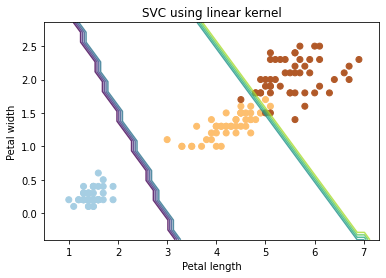

In [20]:
plt.subplot(111)
z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
z = z.reshape(xx.shape)

plt.contour(xx,yy,z,cmp=plt.cm.Paired,alpha=0.8)
plt.scatter(x[:,0],x[:,1],c=y,cmap=plt.cm.Paired)

plt.xlabel('Petal length')
plt.ylabel('Petal width')
plt.xlim(xx.min()),xx.max()
plt.title('SVC using linear kernel')
plt.show()

In [23]:
# divide the data into training and testing data     

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=42)

svc = svm.SVC(kernel='linear', C=1, gamma='auto').fit(x_train,y_train)

In [25]:
#Evaluating performance 
classification_results = svc.predict(x_test)
print(metrics.classification_report(classification_results,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



c:\Users\kajan\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Confusion matrix
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


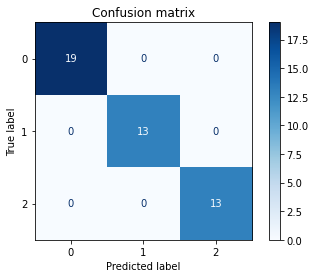

In [27]:
title_option = [('Confusion matrix', None)]

for title, normalize in title_option:
    disp = plot_confusion_matrix(svc,x_test,y_test, cmap=plt.cm.Blues, normalize= normalize)
    disp.ax_.set_title(title)


    print(title)
    print(disp.confusion_matrix)

    plt.show()
